# Задание 1 (6 баллов)

В данном задании мы будем работать со [списком 250 лучших фильмов IMDb](https://www.imdb.com/chart/top/?ref_=nv_mp_mv250)

1. Выведите топ-4 *фильма* **по количеству оценок пользователей** и **количество этих оценок** (1 балл)
2. Выведите топ-4 лучших *года* (**по среднему рейтингу фильмов в этом году**) и **средний рейтинг** (1 балл)
3. Постройте отсортированный **barplot**, где показано **количество фильмов** из списка **для каждого режисёра** (только для режиссёров с более чем 2 фильмами в списке) (1 балл)
4. Выведите топ-4 самых популярных *режиссёра* (**по общему числу людей оценивших их фильмы**) (2 балла)
5. Сохраните данные по всем 250 фильмам в виде таблицы с колонками (name, rank, year, rating, n_reviews, director) в любом формате (2 балла)

Использовать можно что-угодно, но полученные данные должны быть +- актуальными на момент сдачи задания

In [254]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import json
import requests
from bs4 import BeautifulSoup
import lxml
import re
import io
import pandas as pd
import matplotlib.pyplot as plt

1. Tоп-4 *фильма* **по количеству оценок пользователей** и **количество этих оценок**

In [51]:
response = requests.get("https://www.imdb.com/chart/top/?sort=nv,desc&mode=simple&page=1")
soup = BeautifulSoup(response.content, "lxml")

In [114]:
soup_1_film=soup.find_all('a', "width"=="45", string=True)  #search film
soup_1_amount = soup.find_all('strong', title=True)         #search number of users

output = dict()
for i in range(0, 4):
    output[soup_1_film[i].text] = soup_1_amount[i].attrs["title"].split()[3].replace(",", '')

In [122]:
df = pd.DataFrame.from_dict(output, orient='index')
df

,0
Побег из Шоушенка,2728085
Темный рыцарь,2701057
Начало,2397325
Бойцовский клуб,2171102


#### Так как потом все равно собирать датафрейм, то для удобства сделал это сейчас

In [189]:
response = requests.get("https://www.imdb.com/chart/top/?ref_=nv_mp_mv250")
soup = BeautifulSoup(response.content, "lxml")

In [209]:
list_film= list(map(lambda x: x.text, soup.find_all('a', "width"=="45", string=True)[:250]))                                                    #search film
list_review = list(map(lambda x: int(x.attrs["title"].split()[3].replace(",", '')), soup.find_all('strong', title=True)))                       #search number of users
list_rating = list(map(lambda x: float(x.text), soup.find_all('strong', title=True)))                                                           #search rating
list_years = list(map(lambda x: re.sub('[\(\)]', '', x.next_sibling.next_sibling.text), soup.find_all('a', "width"=="45", string=True)[:250]))  #search year
list_director = list(map(lambda x: x.attrs["title"].split(' (dir.)')[0], soup.find_all('a', "width"=="45", string=True)[:250]))                 #search directors
list_rank = list(map(lambda x: int(x.previous_sibling.strip().replace('.', '')), soup.find_all('a', "width"=="45", string=True)[:250]))         #search rank

In [214]:
pd_dict  = {'name': list_film, 'rank': list_rank, 'year': list_years, 'rating': list_rating, 'n_reviews': list_review, 'director': list_director}
df_films = pd.DataFrame(pd_dict, index=range(0, 250))
df_films

,name,rank,year,rating,n_reviews,director
0,Побег из Шоушенка,1,1994,9.2,2728109,Frank Darabont
1,Крёстный отец,2,1972,9.2,1896673,Francis Ford Coppola
2,Темный рыцарь,3,2008,9.0,2701075,Christopher Nolan
3,Крёстный отец 2,4,1974,9.0,1293335,Francis Ford Coppola
4,12 рaзгневанных мужчин,5,1957,9.0,806984,Sidney Lumet
...,...,...,...,...,...,...
245,Стальной гигант,246,1999,8.0,206860,Brad Bird
246,Прислуга,247,2011,8.0,469734,Tate Taylor
247,Аладдин,248,1992,8.0,432788,Ron Clements
248,Дерсу Узала,249,1975,8.0,31557,Akira Kurosawa


2. Топ-4 лучших *года* (**по среднему рейтингу фильмов в этом году**) и **средний рейтинг** 

In [262]:
df_films.groupby('year').aggregate({'rating': 'mean'}).sort_values('rating', ascending=False).head(4)

,rating
year,
1972,9.20
1994,8.76
1974,8.55
1991,8.55


3. Постройте отсортированный **barplot**, где показано **количество фильмов** из списка **для каждого режисёра** 

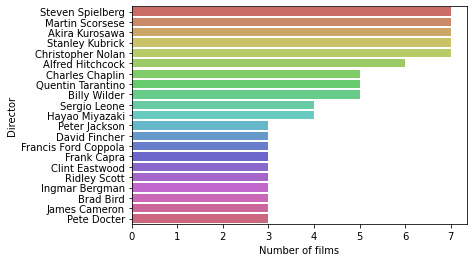

In [266]:
import seaborn as sns

df_directors = df_films.value_counts('director')[df_films.value_counts('director')>2]

sns.barplot(df_directors, df_directors.index, palette="hls")
plt.xlabel('Number of films')
plt.ylabel('Director');

4. Выведите топ-4 самых популярных *режиссёра* (**по общему числу людей оценивших их фильмы**)

In [263]:
df_films.groupby('director').aggregate({'n_reviews': 'sum'}).sort_values('n_reviews', ascending=False).head(4)

,n_reviews
director,
Christopher Nolan,12829845
Quentin Tarantino,7337596
Steven Spielberg,7181781
Martin Scorsese,7080868


5. Сохраните данные по всем 250 фильмам в виде таблицы с колонками (name, rank, year, rating, n_reviews, director) в любом формате

In [264]:
df_films

,name,rank,year,rating,n_reviews,director
0,Побег из Шоушенка,1,1994,9.2,2728109,Frank Darabont
1,Крёстный отец,2,1972,9.2,1896673,Francis Ford Coppola
2,Темный рыцарь,3,2008,9.0,2701075,Christopher Nolan
3,Крёстный отец 2,4,1974,9.0,1293335,Francis Ford Coppola
4,12 рaзгневанных мужчин,5,1957,9.0,806984,Sidney Lumet
...,...,...,...,...,...,...
245,Стальной гигант,246,1999,8.0,206860,Brad Bird
246,Прислуга,247,2011,8.0,469734,Tate Taylor
247,Аладдин,248,1992,8.0,432788,Ron Clements
248,Дерсу Узала,249,1975,8.0,31557,Akira Kurosawa


# Задание 2 (10 баллов)

Напишите декоратор `telegram_logger`, который будет логировать запуски декорируемых функций и отправлять сообщения в телеграм.


Вся информация про API телеграм ботов есть в официальной документации, начать изучение можно с [этой страницы](https://core.telegram.org/bots#how-do-bots-work) (разделы "How Do Bots Work?" и "How Do I Create a Bot?"), далее идите в [API reference](https://core.telegram.org/bots/api)

**Основной функционал:**
1. Декоратор должен принимать **один обязательный аргумент** &mdash; ваш **CHAT_ID** в телеграме. Как узнать свой **CHAT_ID** можно найти в интернете
2. В сообщении об успешно завершённой функции должны быть указаны её **имя** и **время выполнения**
3. В сообщении о функции, завершившейся с исключением, должно быть указано **имя функции**, **тип** и **текст ошибки**
4. Ключевые элементы сообщения должны быть выделены **как код** (см. скриншот), форматирование остальных элементов по вашему желанию
5. Время выполнения менее 1 дня отображается как `HH:MM:SS.μμμμμμ`, время выполнения более 1 дня как `DDD days, HH:MM:SS`. Писать форматирование самим не нужно, всё уже где-то сделано за вас

**Дополнительный функционал:**
1. К сообщению также должен быть прикреплён **файл**, содержащий всё, что декорируемая функция записывала в `stdout` и `stderr` во время выполнения. Имя файла это имя декорируемой функции с расширением `.log` (**+3 дополнительных балла**)
2. Реализовать предыдущий пункт, не создавая файлов на диске (**+2 дополнительных балла**)
3. Если функция ничего не печатает в `stdout` и `stderr` &mdash; отправлять файл не нужно

**Важные примечания:**
1. Ни в коем случае не храните свой API токен в коде и не загружайте его ни в каком виде свой в репозиторий. Сохраните его в **переменной окружения** `TG_API_TOKEN`, тогда его можно будет получить из кода при помощи `os.getenv("TG_API_TOKEN")`. Ручное создание переменных окружения может быть не очень удобным, поэтому можете воспользоваться функцией `load_dotenv` из модуля [dotenv](https://pypi.org/project/python-dotenv/). В доке всё написано, но если коротко, то нужно создать файл `.env` в текущей папке и записать туда `TG_API_TOKEN=<your_token>`, тогда вызов `load_dotenv()` создаст переменные окружения из всех переменных в файле. Это довольно часто используемый способ хранения ключей и прочих приватных данных
2. Функцию `long_lasting_function` из примера по понятным причинам запускать не нужно. Достаточно просто убедится, что большие временные интервалы правильно форматируются при отправке сообщения (как в примерах)
3. Допустима реализация логирования, когда логгер полностью перехватывает запись в `stdout` и `stderr` (то есть при выполнении функций печать происходит **только** в файл)
4. В реальной жизни вам не нужно использовать Telegram API при помощи ручных запросов, вместо этого стоит всегда использовать специальные библиотеки Python, реализующие Telegram API, они более высокоуровневые и удобные. В данном задании мы просто учимся работать с API при помощи написания велосипеда.
5. Обязательно прочтите часть конспекта лекции про API перед выполнением задания, так как мы довольно поверхностно затронули это на лекции

**Рекомендуемые к использованию модули:**
1. os
2. sys
3. io
4. datetime
5. requests
6. dotenv

**Запрещённые модули**:
1. Любые библиотеки, реализующие Telegram API в Python (*python-telegram-bot, Telethon, pyrogram, aiogram, telebot* и так далле...)
2. Библиотеки, занимающиеся "перехватыванием" данных из `stdout` и `stderr` (*pytest-capturelog, contextlib, logging*  и так далле...)



Результат запуска кода ниже должен быть примерно такой:

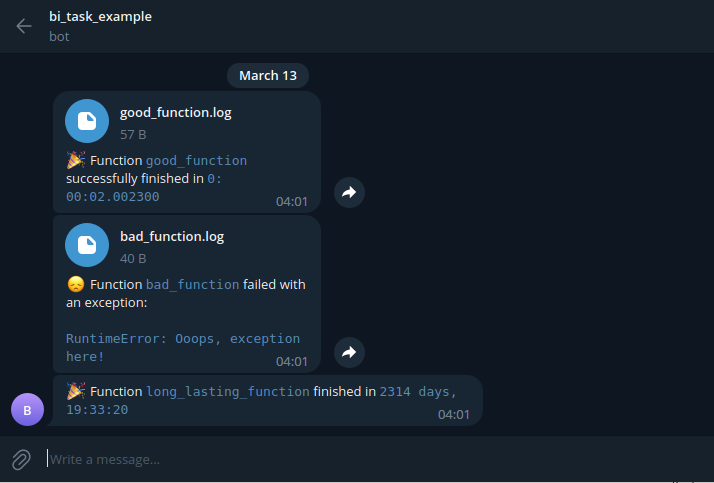

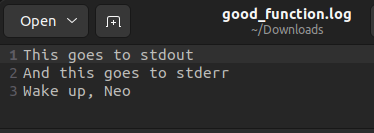

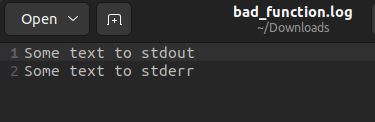

In [7]:
import os
import sys
import time
import io
import datetime
import requests
import dotenv

In [2]:
dotenv.load_dotenv(dotenv.find_dotenv())

TG_API_TOKEN = os.environ.get("TG_API_TOKEN")

In [8]:
CHAT_ID = requests.get(f'https://api.telegram.org/bot6247099390:AAEQwNw4NtJmxzLjKmFIs_mq20mtzvfpG70/getUpdates')

In [9]:
CHAT_ID = CHAT_ID.json()['result'][0]['message']["from"]["id"]

In [13]:
def telegram_logger(chat_id):
    def wrapper(func):
        def inner_function(*args, **kwargs):
            url_pattern = f'https://api.telegram.org/bot{TG_API_TOKEN}/'
            logging = io.StringIO()
            chekpoint_stdout, chekpoint_stderr  = sys.stdout, sys.stderr
            sys.stdout, sys.stderr = logging, logging
            
            try:
                start = datetime.datetime.now()
                func()
                if func.__name__ == 'long_lasting_function':
                    time_report = datetime.datetime.now() + datetime.timedelta(seconds = 199999990) - start
                else: 
                    time_report = datetime.datetime.now() - start
                user_message = f'Function <code>{func.__name__}</code> successfully finished in <code>{time_report}</code>'
            except Exception as exception:
                user_message = f'Function <code>{func.__name__}</code> failed with exception: <code>{repr(exception)}</code>'
            
            if len(logging.getvalue()) > 0:
                logging.__name__ = f'{func.__name__}.log'
                requests.post(url_pattern + 'sendDocument', data = {'chat_id': chat_id,
                                                                    'caption': user_message,
                                                                    'parse_mode': 'HTML'},
                                                            files = {'document': (logging.__name__, logging.getvalue().strip())})

            else:
                requests.post(url_pattern + 'sendMessage', params = {'chat_id': chat_id,
                                                                     'text': user_message,
                                                                     'parse_mode': 'HTML'})  
        
            sys.stdout, sys.stderr = chekpoint_stdout, chekpoint_stderr
            
        return inner_function
    return wrapper


@telegram_logger(CHAT_ID)
def good_function():
    print("This goes to stdout")
    print("And this goes to stderr", file=sys.stderr)
    time.sleep(2)
    print("Wake up, Neo")

@telegram_logger(CHAT_ID)
def bad_function():
    print("Some text to stdout")
    time.sleep(2)
    print("Some text to stderr", file=sys.stderr)
    raise RuntimeError("Ooops, exception here!")
    print("This text follows exception and should not appear in logs")
    
@telegram_logger(CHAT_ID)
def long_lasting_function():
    time.sleep(10)


good_function()

try:
    bad_function()
except Exception:
    pass

long_lasting_function()

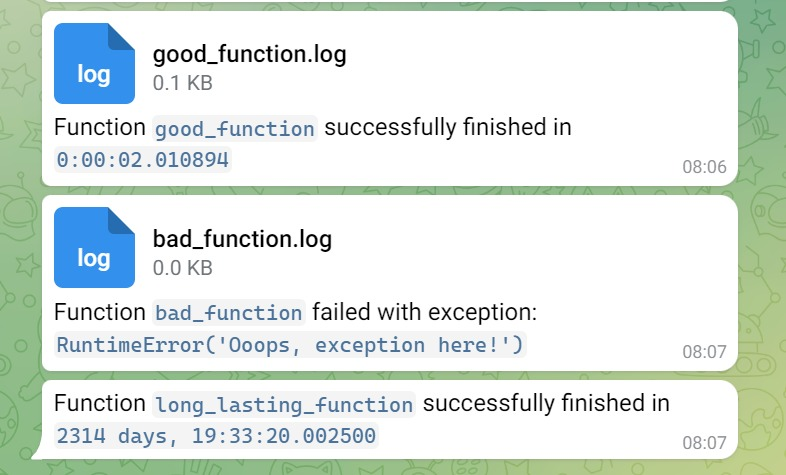
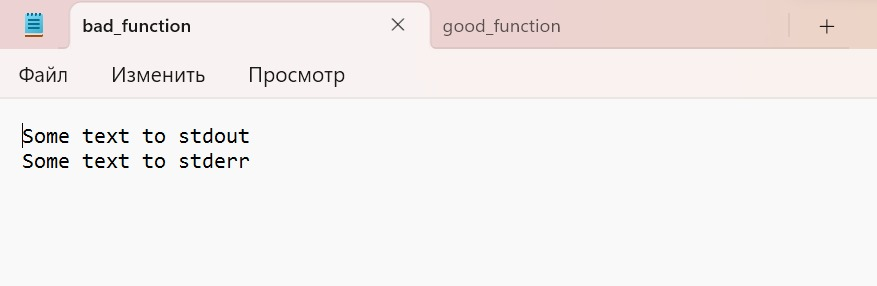
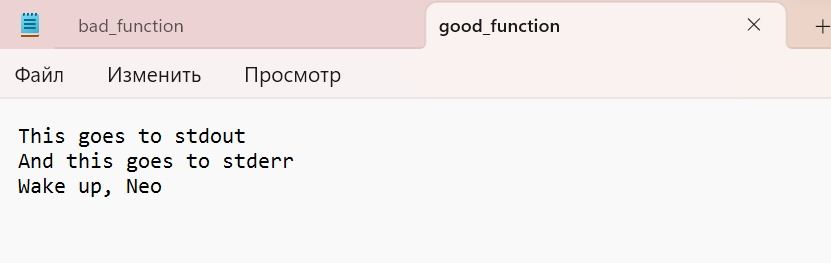

# Задание 3

В данном задании от вас потребуется сделать Python API для какого-либо сервиса

В задании предложено два варианта: простой и сложный, **выберите только один** из них.

Можно использовать только **модули стандартной библиотеки** и **requests**. Любые другие модули можно по согласованию с преподавателем.

❗❗❗ В **данном задании** требуется оформить код в виде отдельного модуля (как будто вы пишете свою библиотеку). Код в ноутбуке проверяться не будет ❗❗❗

## Вариант 1 (простой, 10 баллов)

В данном задании вам потребуется сделать Python API для сервиса http://hollywood.mit.edu/GENSCAN.html

Он способен находить и вырезать интроны в переданной нуклеотидной последовательности. Делает он это не очень хорошо, но это лучше, чем ничего. К тому же у него действительно нет публичного API.

Реализуйте следующую функцию:
`run_genscan(sequence=None, sequence_file=None, organism="Vertebrate", exon_cutoff=1.00, sequence_name="")` &mdash; выполняет запрос аналогичный заполнению формы на сайте. Принимает на вход все параметры, которые можно указать на сайте (кроме Print options). `sequence` &mdash; последовательность в виде строки или любого удобного вам типа данных, `sequence_file` &mdash; путь к файлу с последовательностью, который может быть загружен и использован вместо `sequence`. Функция должна будет возвращать объект типа `GenscanOutput`. Про него дальше.

Реализуйте **датакласс** `GenscanOutput`, у него должны быть следующие поля:
+ `status` &mdash; статус запроса
+ `cds_list` &mdash; список предсказанных белковых последовательностей с учётом сплайсинга (в самом конце результатов с сайта)
+ `intron_list` &mdash; список найденных интронов. Один интрон можно представить любым типом данных, но он должен хранить информацию о его порядковом номере, его начале и конце. Информацию о интронах можно получить из первой таблицы в результатах на сайте.
+ `exon_list` &mdash; всё аналогично интронам, но только с экзонами.

По желанию можно добавить любые данные, которые вы найдёте в результатах

In [ ]:
# module

## Вариант 2 (очень сложный, 20 дополнительных баллов)

В этом варианте от вас потребуется сделать Python API для BLAST, а именно для конкретной вариации **tblastn** https://blast.ncbi.nlm.nih.gov/Blast.cgi?PROGRAM=tblastn&PAGE_TYPE=BlastSearch&LINK_LOC=blasthome

Хоть у BLAST и есть десктопное приложение, всё-таки есть одна область, где API может быть полезен. Если мы хотим искать последовательность в полногеномных сборках (WGS), а не в базах данных отдельных генов, у нас могут возникнуть проблемы. Так как если мы хотим пробластить нашу последовательность против большого количества геномов нам пришлось бы или вручную отправлять запросы на сайте, или скачивать все геномы и делать поиск локально. И тот и другой способы не очень удобны, поэтому круто было бы иметь способ сделать автоматический запрос, не заходя в браузер.

Необходимо написать функцию для запроса, которая будет принимать 3 обязательных аргумента: **белковая последовательность**, которую мы бластим, **базу данных** (в этом задании нас интересует только WGS, но по желанию можете добавить какую-нибудь ещё), **таксон**, у которого мы ищем последовательность, чаще всего &mdash; конкретный вид. По=желанию можете добавить также любые другие аргументы, соответствующие различным настройкам поиска на сайте. 

Функция дожна возвращать список объектов типа `Alignment`, у него должны быть следующие атрибуты (всё согласно результатам в браузере, удобно посмотреть на рисунке ниже), можно добавить что-нибудь своё:

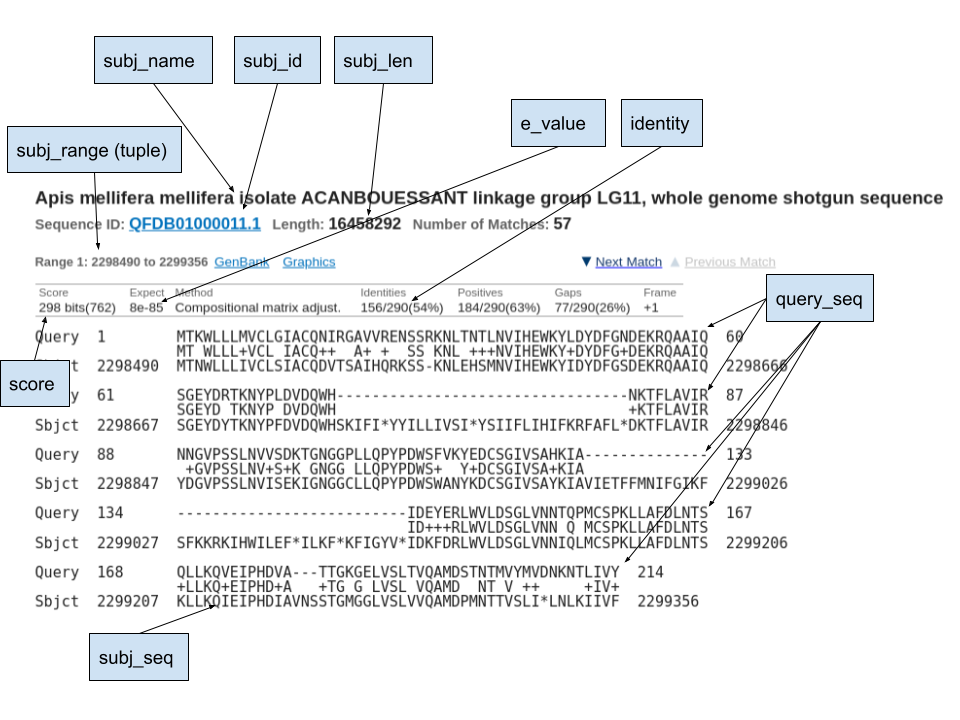


Самое сложное в задании - правильно сделать запрос. Для этого нужно очень глубоко погрузиться в то, что происходит при отправке запроса при помощи инструмента для разработчиков. Ещё одна проблема заключается в том, что BLAST не отдаёт результаты сразу, какое-то время ваш запрос обрабатывается, при этом изначальный запрос не перекидывает вас на страницу с результатами. Задание не такое простое как кажется из описания!